In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('CIC-IDS- 2017/combined_dataframe.csv')
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

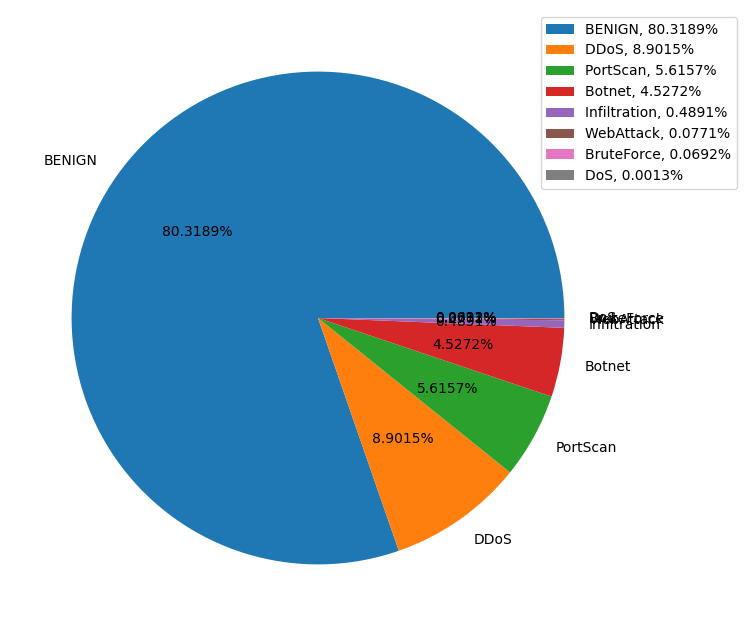

In [5]:
import matplotlib.pyplot as plt

# Assuming cicidsdf is your DataFrame
label_counts = df.Label.value_counts()

# Create a list of labels based on the unique values in 'Label' column
labels = ['BENIGN', 'DDoS', 'PortScan', 'Botnet', 'Infiltration', 'WebAttack', 'BruteForce', 'DoS']

plt.figure(figsize=(8,8))
plt.pie(label_counts, labels=labels[:len(label_counts)], autopct='%0.4f%%')
labels = [f'{l}, {s:0.4f}%' for l, s in zip(labels, (label_counts/df.shape[0])*100)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.savefig('plots/Pie_chart_binary.png', bbox_inches='tight')  # bbox_inches='tight' ensures the legend is not cut off
plt.show()


In [6]:
le = LabelEncoder()

df['Label'] = le.fit_transform(df['Label'])

encoded_labels = {num:label for (num, label) in zip(range(15), le.classes_)}

encoded_labels

{0: 'BENIGN',
 1: 'Botnet',
 2: 'Brute Force',
 3: 'DDoS',
 4: 'DoS',
 5: 'Infiltration',
 6: 'PortScan',
 7: 'Web Attack'}

In [8]:

# Separate features and labels
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
X

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [9]:
ss = StandardScaler().fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(.99).fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [11]:
norm = Normalizer().fit(x_train)

x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

In [12]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [13]:
np.save("data/cic/x_train.npy", x_train)
np.save("data/cic/y_train.npy", y_train)
np.save("data/cic/x_test.npy", x_test)
np.save("data/cic/y_test.npy", y_test)

In [14]:
y_train.shape

(2120907, 1)

In [15]:
x_train.shape

(2120907, 33)

In [24]:
gen = np.load('data/cic/generated.npy')
gen

array([[-0.7338148 , -0.00676105,  0.06744368, ..., -0.09603582,
         0.00529143, -0.00546054],
       [-0.43707135, -0.00863321,  0.08972798, ..., -0.01053894,
        -0.00174565,  0.01200141],
       [-0.46304548,  0.00158329,  0.06464477, ..., -0.01213647,
         0.00303021,  0.02434661],
       ...,
       [-0.2899591 ,  0.02840687,  0.03253699, ...,  0.07944018,
        -0.0082503 , -0.01702065],
       [-0.2898618 ,  0.02801617,  0.03192683, ...,  0.07897329,
        -0.00832099, -0.01761491],
       [-0.2931487 ,  0.0305201 ,  0.02791549, ...,  0.08051094,
        -0.00495455, -0.01872211]], dtype=float32)